## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.



In [2]:
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [22]:
#data[data['ORBIT_CNT']==3869200170]
x = 2 * data.mean(axis=0)
print(x)

last = data.max()
print (last['BX_COUNTER'])
x = int(last['BX_COUNTER'])

HEAD           2.000000e+00
FPGA           5.918396e-01
TDC_CHANNEL    1.116514e+02
ORBIT_CNT      7.738412e+09
BX_COUNTER     3.562193e+03
TDC_MEAS       2.664679e+01
dtype: float64
3563


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [30]:
smol = data.min()
print (smol)
#data2 = data-smol
#print (data2)
#data['TIME_ns'] = pd.Series((data['ORBIT_CNT']-smol['ORBIT_CNT'])*x*30 +data['BX_COUNTER']*30+data['TDC_MEAS']*1.2, index=data.index)
#data['TDC_MEAS']*25/30+data['BX_COUNTER']*25
print(data)

HEAD           1.000000e+00
FPGA           0.000000e+00
TDC_CHANNEL    1.000000e+00
ORBIT_CNT      3.869200e+09
BX_COUNTER     0.000000e+00
TDC_MEAS       0.000000e+00
TIME_ns        0.000000e+00
dtype: float64
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0           1     0          123  3869200167        2374        26   
1           1     0          124  3869200167        2374        27   
2           1     0           63  3869200167        2553        28   
3           1     0           64  3869200167        2558        19   
4           1     0           64  3869200167        2760        25   
...       ...   ...          ...         ...         ...       ...   
1310715     1     0           62  3869211171         762        14   
1310716     1     1            4  3869211171         763        11   
1310717     1     0           64  3869211171         764         0   
1310718     1     0          139  3869211171         769         0   
1310719     1     0

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [31]:
data['TIME_ns'] = pd.Series((data['ORBIT_CNT']-smol['ORBIT_CNT'])*x*30 +data['BX_COUNTER']*30+data['TDC_MEAS']*1.2, index=data.index)

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [10]:
npr.seed(12345)
data['HEAD']=npr.randint(0,2,size=(len(data)))
print(data)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           0     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           0     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     0     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     0     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [29]:
data_1 = data[data['HEAD']==1]
print(data_1)
data_0 = data[data['HEAD']==0]
print(data_0)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
5           1     0           63  3869200167        2762         4
8           1     0           62  3869200167        2774        21
...       ...   ...          ...         ...         ...       ...
1310712     1     1           35  3869211171         429         4
1310713     1     0           64  3869211171         758        18
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310719     1     0           61  3869211171         762        18

[654758 rows x 6 columns]
         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           0     0          123  3869200167        2374        26
4           0     0           64  3

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

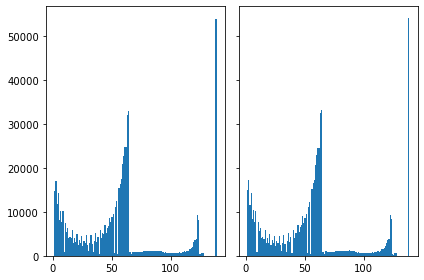

In [30]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(data_1['TDC_CHANNEL'], bins=139)
axs[1].hist(data_0['TDC_CHANNEL'], bins=139)
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [40]:
data_00 = data_0.groupby(['TDC_CHANNEL']).sum()
data_00.sort_values(by='ORBIT_CNT', ascending = False)

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS
TDC_CHANNEL,,,,,
139,0,16263,209320184491935,96375626,0
64,0,745,128271925013030,59150351,482821
63,0,463,125764679026522,58160756,472437
61,0,363,95372064098977,44015370,358113
62,0,559,95012227828452,43839555,358505
...,...,...,...,...,...
126,0,275,1064031623353,495720,3990
138,0,20,158637478023,80106,271
137,0,19,147029838584,67222,406


In [41]:
data_11 = data_1.groupby(['TDC_CHANNEL']).sum()
data_11.sort_values(by='ORBIT_CNT', ascending = False)

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS
TDC_CHANNEL,,,,,
139,53960,16179,208782364995022,96102078,0
64,32868,694,127173069355945,58616700,479374
63,32138,455,124348548603672,57321674,465755
61,24830,417,96072389577063,44219304,360931
62,24793,515,95929229109905,44116628,360587
...,...,...,...,...,...
67,310,227,1199453866925,537023,4518
130,34,16,131552996670,55122,506
137,30,17,116076206927,56698,342


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139